<ipython-input-15-6e2e3fb7bfb5>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


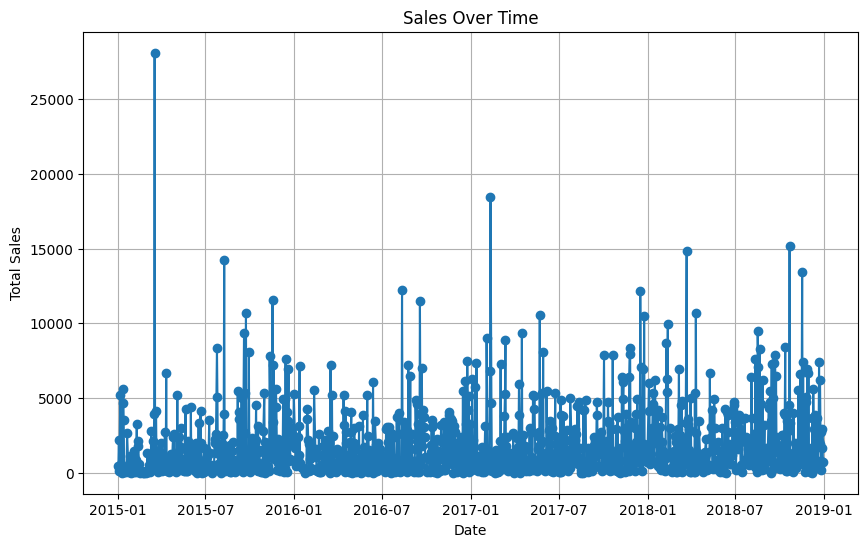

<Figure size 1000x600 with 0 Axes>

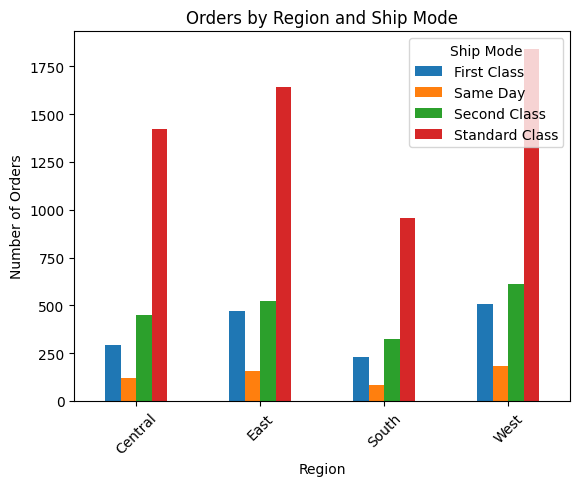

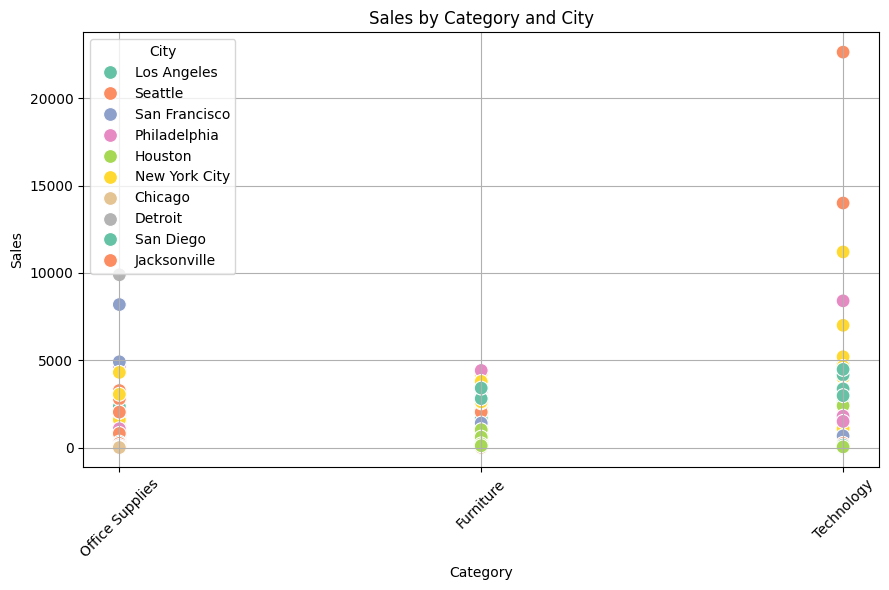

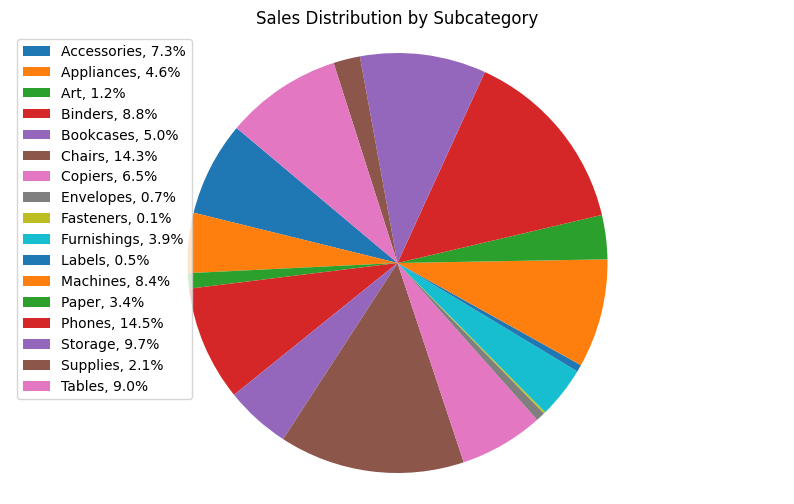

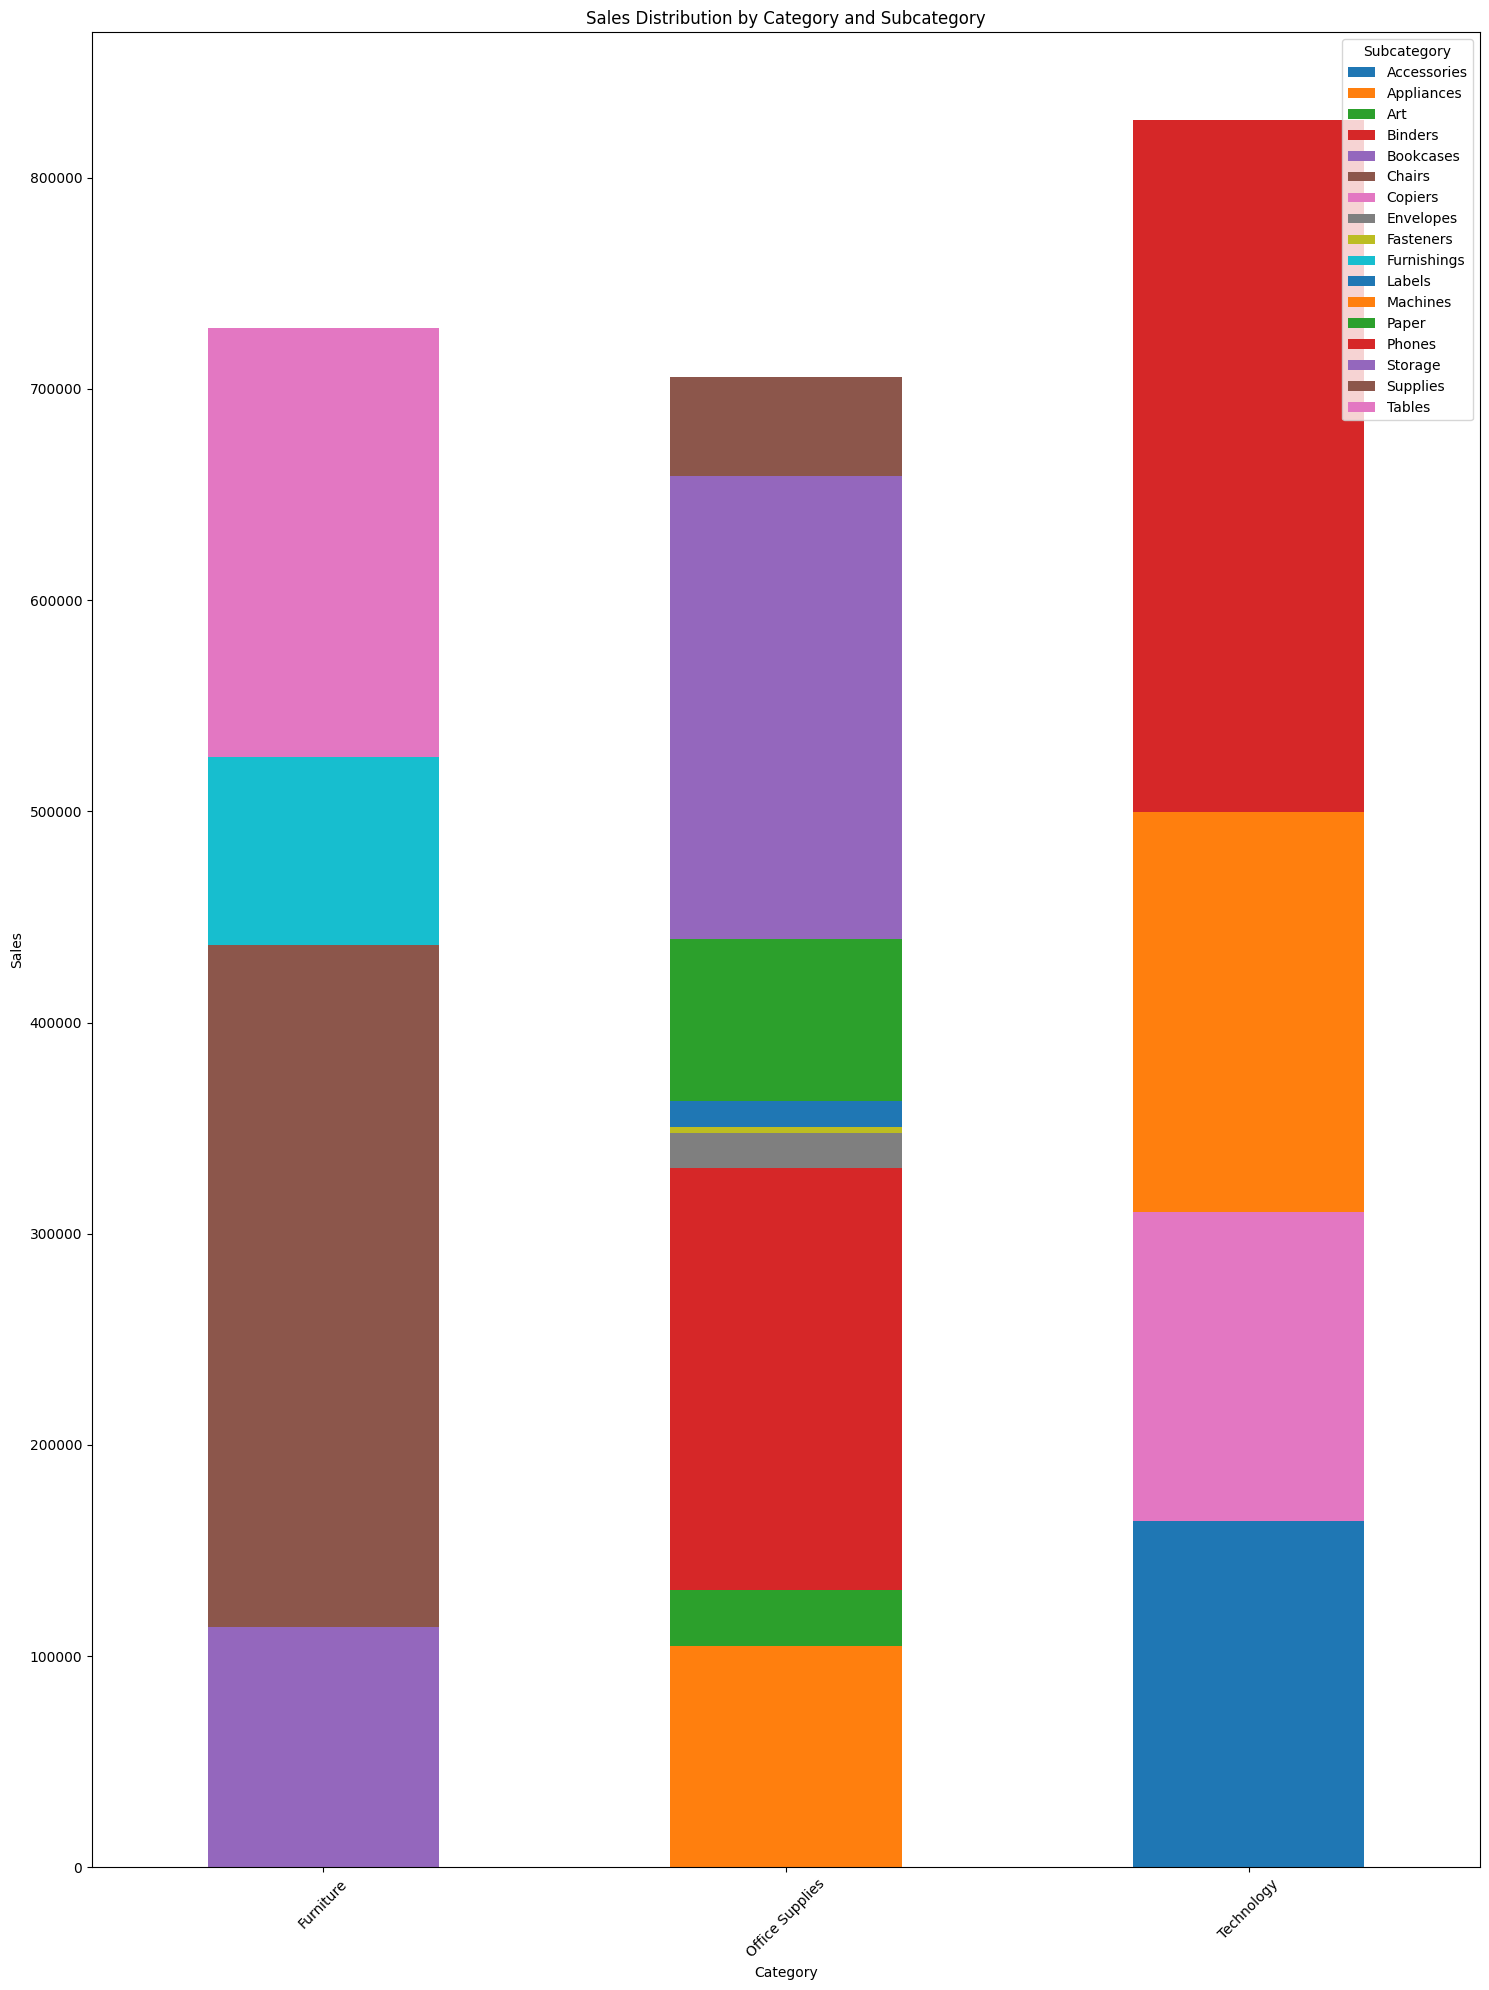

<ipython-input-15-6e2e3fb7bfb5>:120: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


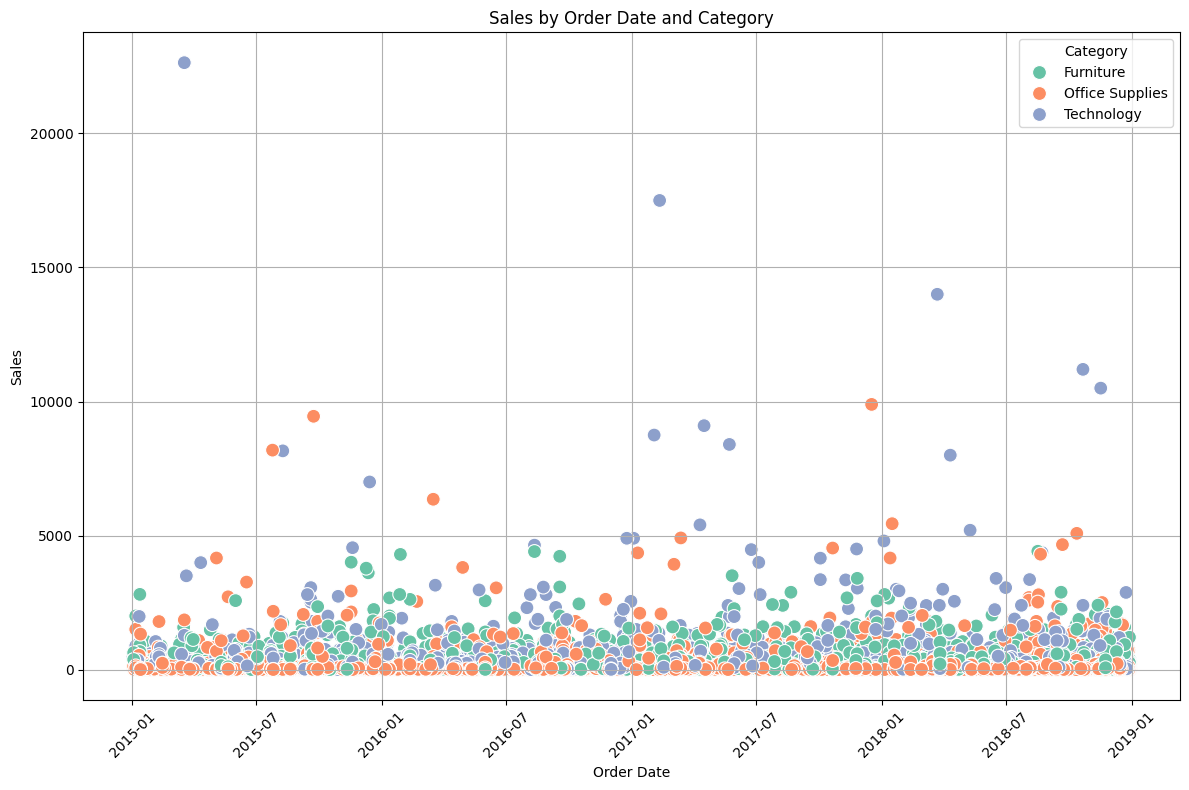

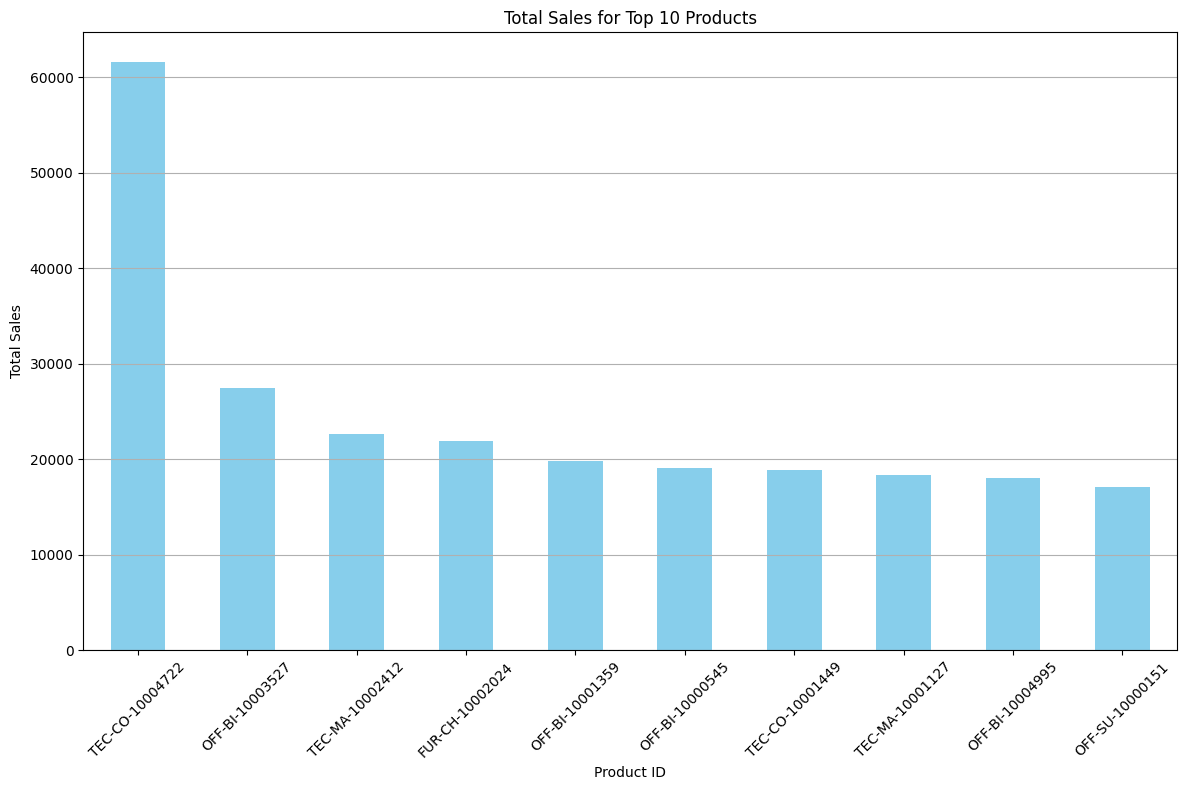

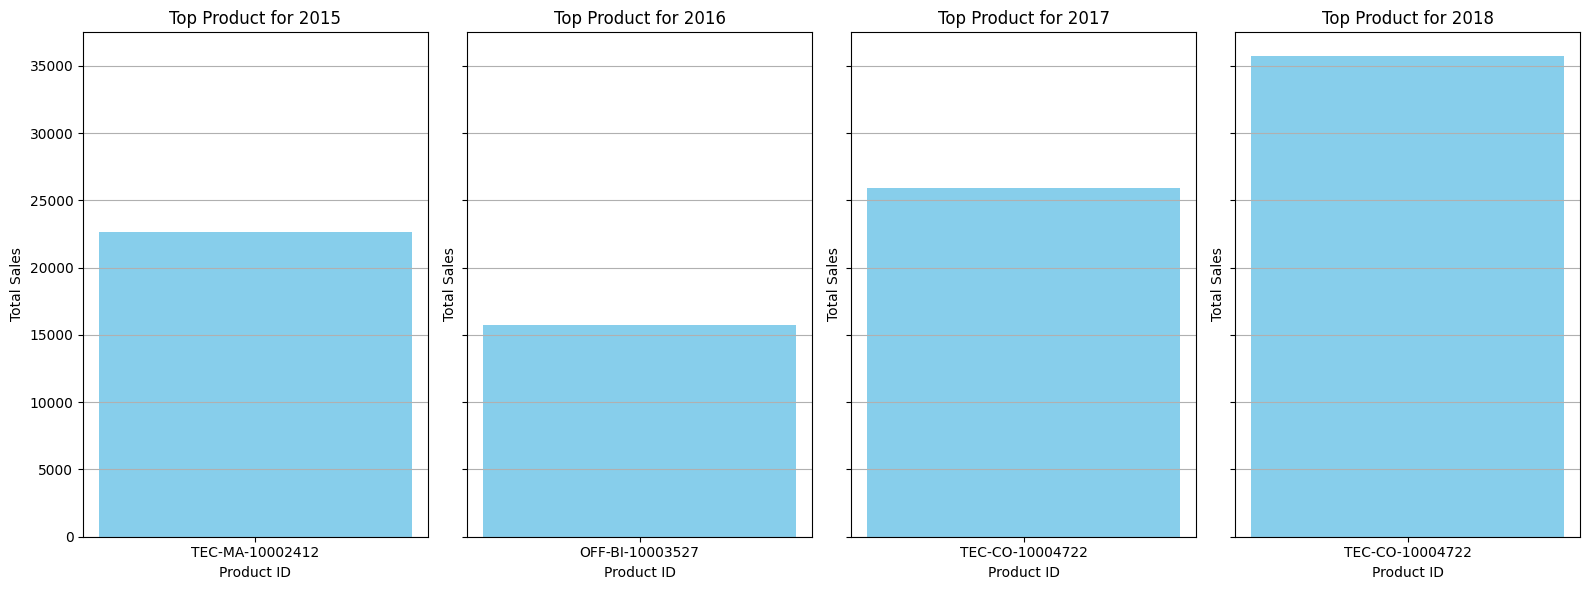

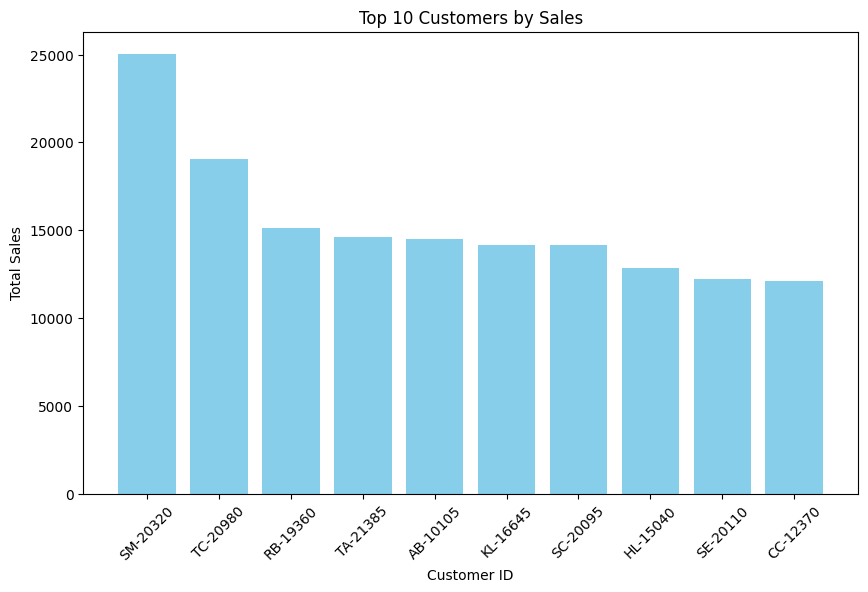

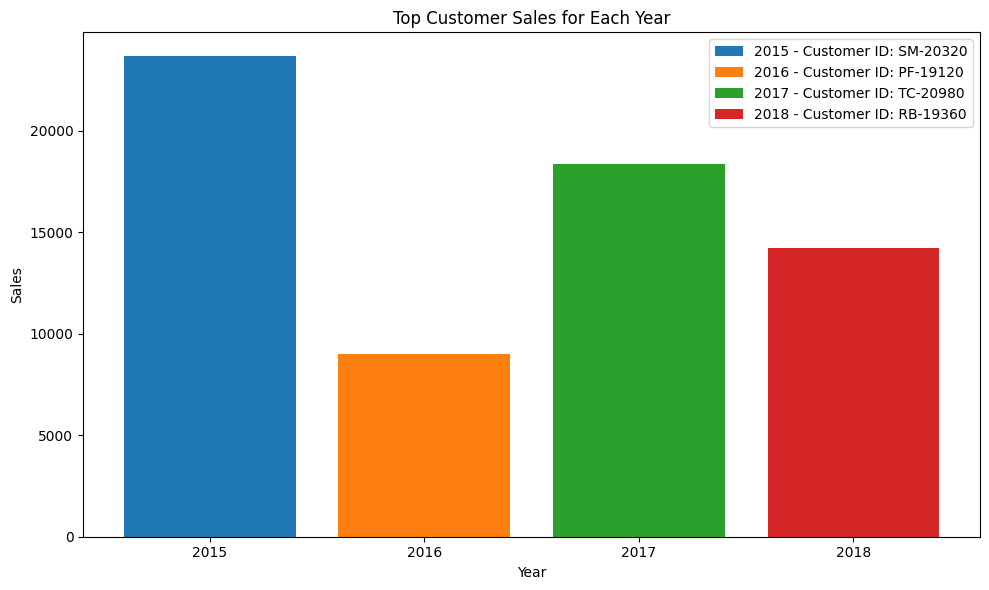

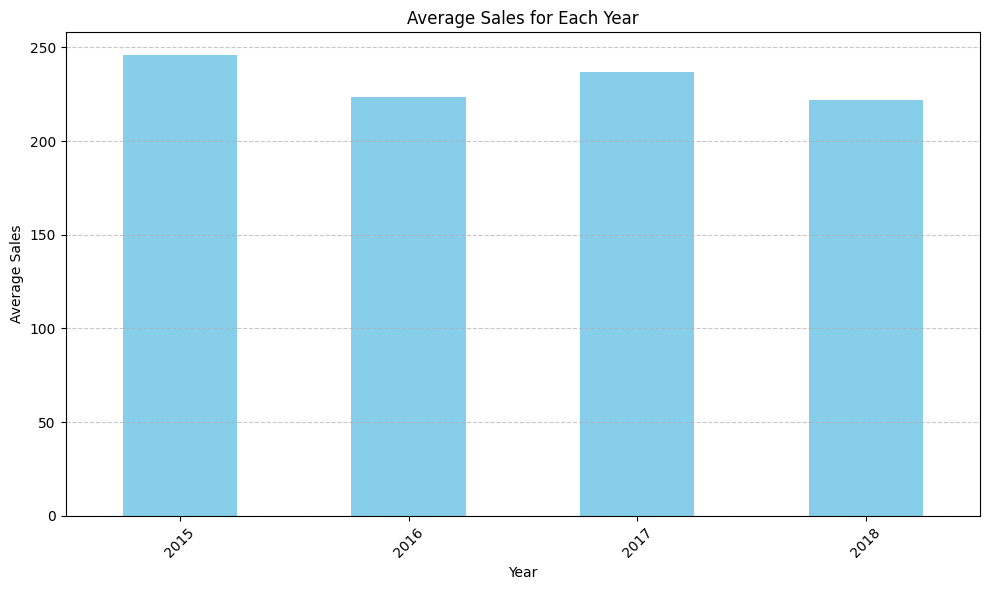

      Year       Product_ID  \
2697  2015  TEC-MA-10002412   
509   2016  OFF-BI-10003527   
6826  2017  TEC-CO-10004722   
8153  2018  TEC-CO-10004722   

                                           Product_Name Customer_ID     Sales  
2697  Cisco TelePresence System EX90 Videoconferenci...    SM-20320  22638.48  
509   Fellowes PB500 Electric Punch Plastic Comb Bin...    CM-12385   6354.95  
6826              Canon imageCLASS 2200 Advanced Copier    TC-20980  17499.95  
8153              Canon imageCLASS 2200 Advanced Copier    RB-19360  13999.96  


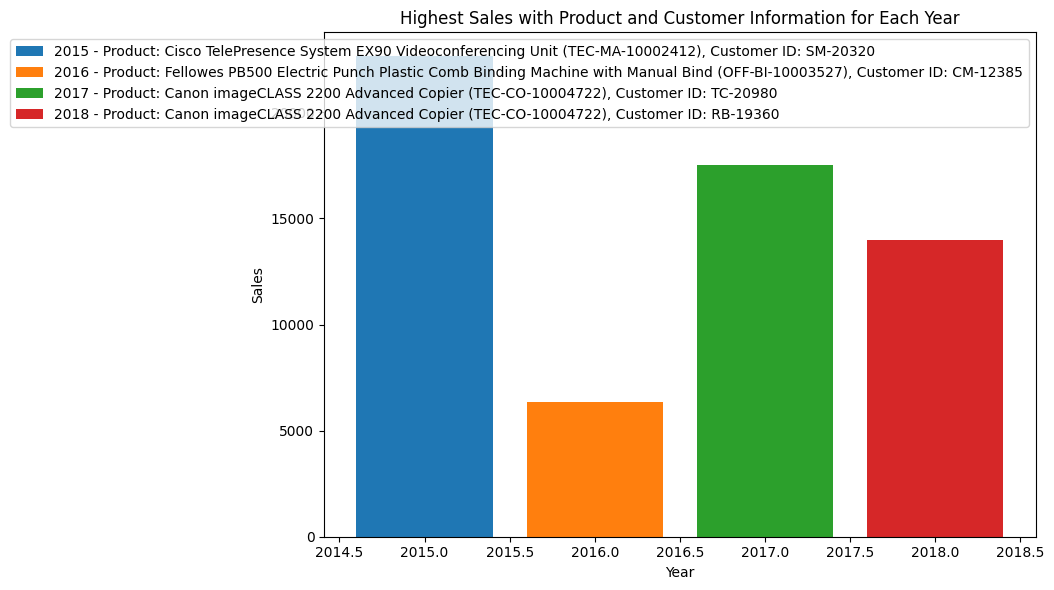

In [15]:
#to visualise date and the totalsales

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/superstore_dataday3dhv.csv')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Group by Order_Date and sum sales
sales_over_time = df.groupby('Order_Date')['Sales'].sum()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(sales_over_time, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


#to visualise region and the shipmode

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
df=pd.read_csv('/content/superstore_dataday3dhv.csv')
# Group by Region and Ship Mode, then count the number of orders
region_ship_mode_counts = df.groupby(['Region', 'Ship_Mode']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
region_ship_mode_counts.plot(kind='bar', stacked=False)
plt.title('Orders by Region and Ship Mode')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Ship Mode')
plt.show()

#to visualise sales by country and city

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset
df=pd.read_csv('/content/superstore_dataday3dhv.csv')
# Filter top 10 cities by sales for better visualization
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).index
df_filtered = df[df['City'].isin(top_cities)]

# Plotting
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_filtered, x='Category', y='Sales', hue='City', palette='Set2', s=100)
plt.title('Sales by Category and City')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

#to visualise sales by subcategory

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
df=pd.read_csv('/content/superstore_dataday3dhv.csv')
# Group by Sub_Category and sum the sales
subcategory_sales = df.groupby('Sub_Category')['Sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(subcategory_sales, startangle=140)
plt.title('Sales Distribution by Subcategory')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend for the category labels and percentages
plt.legend(loc='upper left', labels=['%s, %1.1f%%' % (label, subcategory_sales[i] / subcategory_sales.sum() * 100) for i, label in enumerate(subcategory_sales.index)])

plt.show()

#to visualise sales by category and subcategory using bar chart

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Group by Category and Sub_Category and sum the sales
category_subcategory_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 20))

# Plotting stacked bar chart for each category
category_subcategory_sales.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sales Distribution by Category and Subcategory')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Subcategory')

plt.tight_layout()
plt.show()

#to visuaise sales-by category and data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Order_Date', y='Sales', hue='Category', palette='Set2', s=100)
plt.title('Sales by Order Date and Category')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

#top 10 product id

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Group by Product_ID and sum the sales, then sort in descending order and select top 10 products
top_product_sales = df.groupby('Product_ID')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales for Top 10 Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



#top product for each year
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract year from Order_Date
df['Year'] = df['Order_Date'].dt.year

# Group by Year and Product_ID, and sum the sales
yearly_product_sales = df.groupby(['Year', 'Product_ID'])['Sales'].sum()

# Find the top-selling product for each year
top_product_by_year = yearly_product_sales.groupby('Year').idxmax().apply(lambda x: x[1])

# Plotting
num_years = len(top_product_by_year)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(16, 6), sharey=True)

for i, (year, product_id) in enumerate(top_product_by_year.items()):
    sales = yearly_product_sales.loc[year]
    axes[i].bar(product_id, sales[product_id], color='skyblue')
    axes[i].set_title(f'Top Product for {year}')
    axes[i].set_xlabel('Product ID')
    axes[i].set_ylabel('Total Sales')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

#top 10 customer id
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# For example: df = pd.read_csv('your_dataset.csv')

# Group by Customer_ID and sum the Sales
sales_by_customer = df.groupby('Customer_ID')['Sales'].sum().reset_index()

# Sort the customers by sales in descending order
top_10_customers = sales_by_customer.sort_values(by='Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_customers['Customer_ID'], top_10_customers['Sales'], color='skyblue')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#top customer each year
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# For example: df = pd.read_csv('your_dataset.csv')

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract year from Order_Date
df['Year'] = df['Order_Date'].dt.year

# Group by Year and Customer_ID, then sum the Sales
sales_by_year_customer = df.groupby(['Year', 'Customer_ID'])['Sales'].sum().reset_index()

# Find the top customer for each year
top_customer_by_year = sales_by_year_customer.loc[sales_by_year_customer.groupby('Year')['Sales'].idxmax()]

# Plot
plt.figure(figsize=(10, 6))
for year, data in top_customer_by_year.groupby('Year'):
    plt.bar(year, data['Sales'], label=str(year) + ' - Customer ID: ' + str(data['Customer_ID'].values[0]))

plt.title('Top Customer Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.xticks(top_customer_by_year['Year'])
plt.tight_layout()
plt.show()

#average sales for each year

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# For example: df = pd.read_csv('your_dataset.csv')

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract year from Order_Date
df['Year'] = df['Order_Date'].dt.year

# Group by Year and calculate average Sales
average_sales_by_year = df.groupby('Year')['Sales'].mean()

# Plot
plt.figure(figsize=(10, 6))
average_sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# For example: df = pd.read_csv('your_dataset.csv')

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract year from Order_Date
df['Year'] = df['Order_Date'].dt.year

# Group by Year and find the row with the highest sales for each year
highest_sales_each_year = df.loc[df.groupby('Year')['Sales'].idxmax()]

# Select relevant columns
highest_sales_info = highest_sales_each_year[['Year', 'Product_ID', 'Product_Name', 'Customer_ID', 'Sales']]

# Print or visualize the data
print(highest_sales_info)

# Optionally, you can plot the highest sales for each year
plt.figure(figsize=(10, 6))
for year, data in highest_sales_info.groupby('Year'):
    plt.bar(year, data['Sales'], label=f'{year} - Product: {data["Product_Name"].values[0]} ({data["Product_ID"].values[0]}), Customer ID: {data["Customer_ID"].values[0]}')

plt.title('Highest Sales with Product and Customer Information for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()









